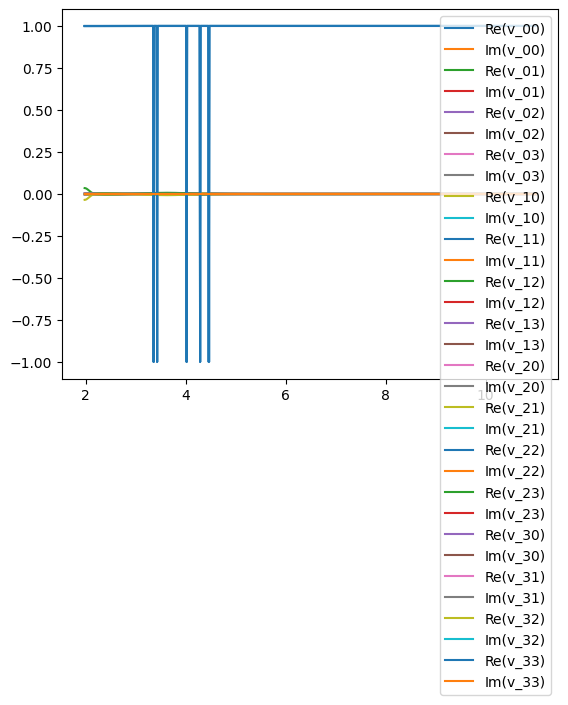

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from scipy.integrate import solve_ivp, simps
from scipy.special import spherical_jn as sph_jn, spherical_yn as sph_yn
from numba import jit


def get_state_curve(h, i, x):
    return np.real(np.diag(h(x))[i])


dir = 'H_2_p'
r, hls, ddrls = load_matrices(dir)
emin = hls[-1,0,0]
n = len(hls[0])
shift = np.array([emin*np.eye(len(hls[0]), dtype=complex)]*len(r))
vd = (hls-shift)/4.637

hfunc, ddrfunc = matrix_funcs(r, vd, ddrls)
dr = 0.01
x = np.arange(np.min(r), np.max(r)+dr, dr)
emax = np.abs(np.array(hfunc(r[0])[-1,-1]))
h = hfunc(x)
eigvals = np.zeros(np.shape(h),dtype=complex)
eigbas = np.zeros(np.shape(h),dtype=complex)
omat = np.zeros((len(x)-1,n,n),dtype=complex)
for i in range(len(x)):
    e, v = np.linalg.eigh(h[i])
    eigvals[i] = np.diag(e)
    eigbas[i] = v
    if i > 0:
        omat[i-1] = np.dot(np.matrix(eigbas[i-1]).H, np.matrix(eigbas[i]))
for i in range(n):
    for j in range(n):
        plt.plot(x[1:], np.real(omat[:,i,j]), label=f'Re(v_{i}{j})')
        plt.plot(x[1:], np.imag(omat[:,i,j]), label=f'Im(v_{i}{j})')
plt.legend()
plt.show()